In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Load data in a dataframe

In [24]:
data = pd.read_csv('tsevent.csv')

In [25]:
data.head()

,SOURCE_ID,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
0,1,-2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
1,3,-1610,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
2,4,-1365,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,5,-1300,NaN,NaN,NaN,NaN,0.0,2.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,-760,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Abstract

### Describing the data

In [26]:
data.describe()

,SOURCE_ID,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
count,2582.000000,2582.000000,2443.000000,2341.000000,1319.000000,1233.000000,2576.000000,2580.000000,867.000000,1459.000000,...,223.000000,263.000000,522.000000,653.000000,116.000000,1006.000000,52.000000,145.000000,2.060000e+02,575.000000
mean,2132.966692,1805.891944,6.621367,15.618539,11.319939,28.225466,1.786879,2.334109,36.205306,7.038725,...,5334.354260,2.304183,4380.680077,2.229709,4805.086534,2.186879,29188.826923,2.268966,3.794183e+04,2.690435
std,1546.994278,350.752703,3.486535,8.680274,6.929352,17.202228,2.260681,1.558476,37.163354,0.803739,...,32961.882201,1.125122,20610.548682,1.214397,24019.330461,1.046609,86723.543401,1.094527,3.767096e+05,0.999039
min,1.000000,-2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,3.200000,...,1.000000,1.000000,1.000000,1.000000,0.003000,1.000000,2.000000,1.000000,1.000000e+00,1.000000
25%,940.250000,1818.000000,4.000000,8.000000,5.000000,14.000000,1.000000,1.000000,19.000000,6.600000,...,19.500000,1.000000,7.000000,1.000000,1.780750,1.000000,119.250000,1.000000,7.075000e+01,2.000000
50%,1797.500000,1895.000000,7.000000,16.000000,11.000000,29.000000,1.000000,2.000000,33.000000,7.000000,...,100.000000,3.000000,56.000000,2.000000,30.000000,2.000000,820.000000,2.000000,7.000000e+02,3.000000
75%,3148.750000,1956.000000,10.000000,23.000000,17.000000,43.000000,1.000000,4.000000,40.000000,7.600000,...,511.000000,3.000000,1001.000000,3.000000,500.000000,3.000000,6851.500000,3.000000,3.000000e+03,3.000000
max,5642.000000,2017.000000,12.000000,31.000000,23.000000,59.000000,11.000000,4.000000,600.000000,9.500000,...,374171.000000,4.000000,316000.000000,4.000000,220085.456000,4.000000,500000.000000,4.000000,5.360000e+06,4.000000


In [27]:
data.COUNTRY

0                  SYRIA
1                 GREECE
2                  SYRIA
3                 TURKEY
4                 ISRAEL
              ...       
2577     SOLOMON ISLANDS
2578    PAPUA NEW GUINEA
2579               CHILE
2580                FIJI
2581    PAPUA NEW GUINEA
Name: COUNTRY, Length: 2582, dtype: object

In [28]:
data.columns

Index(['SOURCE_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'CAUSE',
       'VALIDITY', 'FOCAL_DEPTH', 'PRIMARY_MAGNITUDE', 'REGION_CODE',
       'COUNTRY', 'STATE/PROVINCE', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'MAXIMUM_HEIGHT', 'MAGNITUDE_ABE', 'MAGNITUDE_IIDA',
       'INTENSITY_SOLOVIEV', 'WARNING_STATUS', 'MISSING', 'MISSING_ESTIMATE',
       'INJURIES', 'INJURY_ESTIMATE', 'FATALITIES', 'FATALITY_ESTIMATE',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_ESTIMATE', 'HOUSES_DAMAGED',
       'HOUSE_DAMAGE_ESTIMATE', 'HOUSES_DESTROYED',
       'HOUSE_DESTRUCTION_ESTIMATE', 'ALL_MISSING', 'MISSING_TOTAL',
       'ALL_INJURIES', 'INJURY_TOTAL', 'ALL_FATALITIES', 'FATALITY_TOTAL',
       'ALL_DAMAGE_MILLIONS', 'DAMAGE_TOTAL', 'ALL_HOUSES_DAMAGED',
       'HOUSE_DAMAGE_TOTAL', 'ALL_HOUSES_DESTROYED',
       'HOUSE_DESTRUCTION_TOTAL'],
      dtype='object')

### Data after the year 2000

In [29]:
data_after_2004 = data[data.YEAR >= 2000]

In [30]:
data_after_2004

,SOURCE_ID,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
2380,2350,2000,1.0,26.0,NaN,NaN,9.0,-1.0,0.0,NaN,...,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,300.0,3.0
2381,2922,2000,4.0,5.0,4.0,36.0,1.0,2.0,38.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2382,2338,2000,5.0,4.0,4.0,21.0,1.0,4.0,26.0,7.6,...,264.0,3.0,46.0,1.0,30.0,4.0,NaN,NaN,10000.0,4.0
2383,2341,2000,6.0,18.0,14.0,44.0,1.0,4.0,10.0,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2384,2340,2000,7.0,1.0,7.0,1.0,1.0,4.0,10.0,6.1,...,NaN,3.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,5632,2016,12.0,9.0,19.0,10.0,1.0,4.0,21.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2578,5636,2016,12.0,17.0,10.0,51.0,1.0,4.0,103.0,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2579,5637,2016,12.0,25.0,14.0,22.0,1.0,4.0,35.0,7.6,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2580,5639,2017,1.0,3.0,21.0,5.0,1.0,4.0,17.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data after 2000 and event not questionable

In [31]:
data_after_2004_not_questionable = data[data.CAUSE == 1.0]

In [32]:
data_after_2004_not_questionable

,SOURCE_ID,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
0,1,-2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
2,4,-1365,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,7,-590,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8,-525,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3469,-480,9.0,29.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,5632,2016,12.0,9.0,19.0,10.0,1.0,4.0,21.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2578,5636,2016,12.0,17.0,10.0,51.0,1.0,4.0,103.0,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2579,5637,2016,12.0,25.0,14.0,22.0,1.0,4.0,35.0,7.6,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2580,5639,2017,1.0,3.0,21.0,5.0,1.0,4.0,17.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Earthquake intensity from Volcanos and Earthquakes

In [33]:
non_questionable_earthquake_data_intensity = data_after_2004_not_questionable.INTENSITY_SOLOVIEV

In [34]:
non_questionable_earthquake_data_intensity

0       6.0
2       6.0
5       6.0
6       3.0
7       NaN
       ... 
2577    NaN
2578    NaN
2579    NaN
2580    NaN
2581    NaN
Name: INTENSITY_SOLOVIEV, Length: 1870, dtype: float64

In [35]:
non_questionable_earthquake_data_intensity_from_volcano_earthquake = data[data.CAUSE == 4.0]

In [36]:
non_questionable_earthquake_data_intensity_from_volcano_earthquake

,SOURCE_ID,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
30,3093,79,8.0,24.0,7.0,NaN,4.0,3.0,NaN,NaN,...,NaN,NaN,3500.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
129,3112,1329,6.0,28.0,NaN,NaN,4.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,3129,1631,12.0,17.0,9.0,NaN,4.0,3.0,NaN,NaN,...,NaN,NaN,4000.0,4.0,NaN,4.0,NaN,NaN,NaN,4.0
511,504,1771,11.0,9.0,NaN,NaN,4.0,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
689,658,1827,8.0,8.0,NaN,NaN,4.0,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690,663,1827,8.0,9.0,NaN,NaN,4.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
736,711,1839,2.0,12.0,NaN,NaN,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,948,1866,1.0,31.0,NaN,NaN,4.0,1.0,NaN,6.1,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,52.0,2.0
1026,3451,1868,9.0,5.0,2.0,NaN,4.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1114,1067,1877,2.0,2.0,NaN,NaN,4.0,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Map plotting of the events

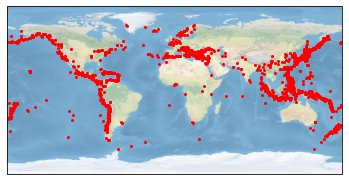

In [38]:
ax = ax = plt.axes(projection=ccrs.PlateCarree())
plt.scatter(
    x=data["LONGITUDE"],
    y=data["LATITUDE"],
    color="red",
    s=4,
    alpha=1,
    transform=ccrs.PlateCarree()
)
ax.stock_img()
plt.show()

# Visualize Data in Histograms

### Intensity for Tsunami created by volcanos

In [17]:
volcano_data = data[data.CAUSE == 6.0]

In [18]:
volcano_data

,SOURCE_ID,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
1,3,-1610,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
18,3473,-198,NaN,NaN,NaN,NaN,6.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,21,46,NaN,NaN,NaN,NaN,6.0,4.0,NaN,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,39,416,NaN,NaN,NaN,NaN,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
72,5457,765,7.0,NaN,NaN,NaN,6.0,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2880,1999,1.0,20.0,NaN,NaN,6.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2407,2694,2003,7.0,12.0,NaN,NaN,6.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2435,2877,2006,5.0,20.0,11.0,20.0,6.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,3587,2008,8.0,8.0,NaN,NaN,6.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


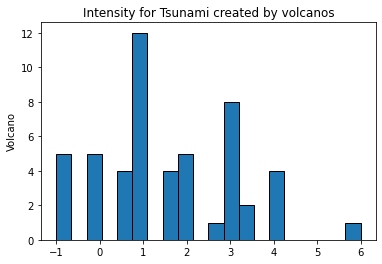

In [19]:
plt.title("Intensity for Tsunami created by volcanos")
plt.hist(volcano_data.INTENSITY_SOLOVIEV, 20, edgecolor = 'black')
plt.ylabel("Volcano")
plt.show()

### Intensity for Tsunami created by Earthquakes

In [20]:
earthquake_data = data[data.CAUSE == 1.0]

In [21]:
earthquake_data

,SOURCE_ID,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
0,1,-2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
2,4,-1365,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,7,-590,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8,-525,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3469,-480,9.0,29.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,5632,2016,12.0,9.0,19.0,10.0,1.0,4.0,21.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2578,5636,2016,12.0,17.0,10.0,51.0,1.0,4.0,103.0,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2579,5637,2016,12.0,25.0,14.0,22.0,1.0,4.0,35.0,7.6,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2580,5639,2017,1.0,3.0,21.0,5.0,1.0,4.0,17.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


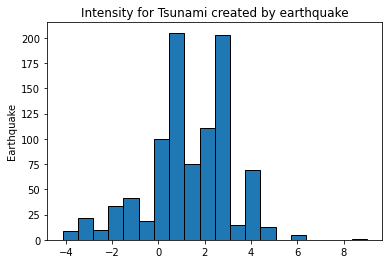

In [22]:
plt.title("Intensity for Tsunami created by earthquake")
plt.hist(earthquake_data.INTENSITY_SOLOVIEV, 20, edgecolor = 'black')
plt.ylabel("Earthquake")
plt.show()